In [57]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [58]:
# load the data
data = pd.read_csv("flight_data.csv")
data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [59]:
# checking correlation of data
corr = data.corr()
corr

/var/folders/f_/6ckdv_lx0vs3v3__lfst9tc40000gn/T/ipykernel_80123/3544932482.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<AxesSubplot: >

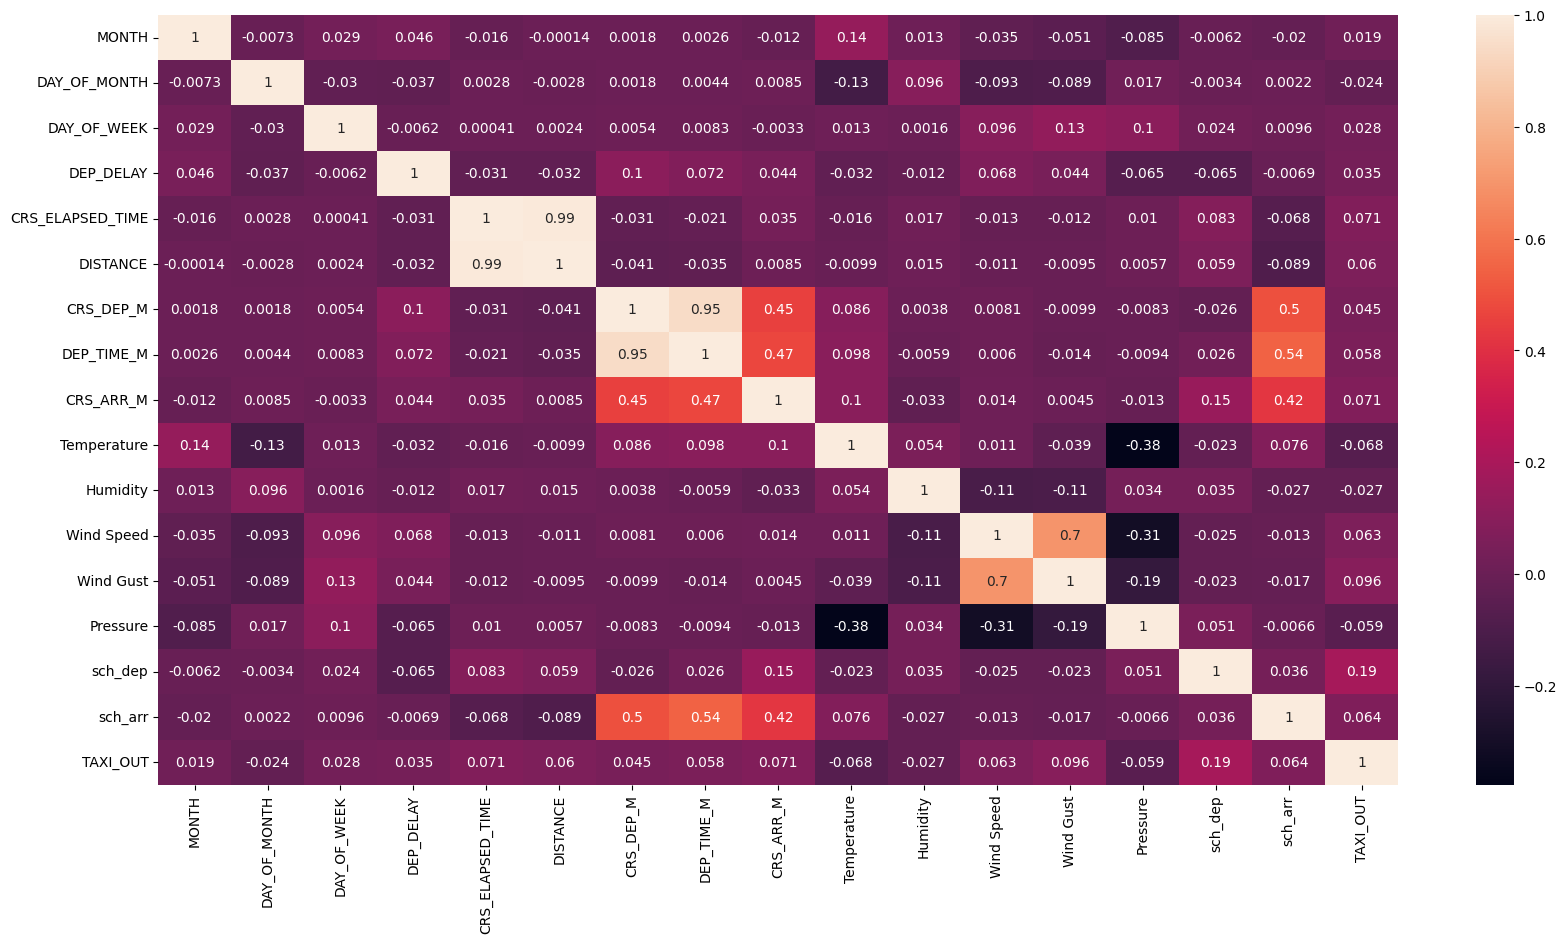

In [60]:
# showing the correlation in heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True)

In [61]:
# checking which variable with more than value of 0.05
taxi_out = corr.loc["TAXI_OUT"]
taxi_out.sort_values() # Distance, Wind speed, Wind Gust

Temperature        -0.067574
Pressure           -0.059290
Humidity           -0.026826
DAY_OF_MONTH       -0.023990
MONTH               0.018505
DAY_OF_WEEK         0.028388
DEP_DELAY           0.034881
CRS_DEP_M           0.044864
DEP_TIME_M          0.057896
DISTANCE            0.059856
Wind Speed          0.062522
sch_arr             0.064284
CRS_ELAPSED_TIME    0.070838
CRS_ARR_M           0.071377
Wind Gust           0.095643
sch_dep             0.190101
TAXI_OUT            1.000000
Name: TAXI_OUT, dtype: float64

In [75]:
# multiple linear regression
X = data.iloc[:28819, [8, 16, 17]].values # Distance, Wind speed, Wind Gust
y = data.iloc[:28819, 22].values # Taxi out

In [63]:
# split train/test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)

In [102]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
# predicting the taxi out of last flight in df by giving Distance, Wind speed, Wind Gust
pred = linear_regressor.predict([[1576, 6, 0]]) 
pred
# actual taxi out of the last flight in df 
actual = data.iloc[-1, -1]
actual

15

In [101]:
print("Predicted Taxi-out: %.1f" % pred)
print("Actual Taxi-out: %.1f" % actual)

Predicted Taxi-out: 20.7
Actual Taxi-out: 15.0


In [106]:
# plt.figure(figsize = (5, 3))
# plt.bar(actual, color = "black")
# plt.xlabel("")
# plt.ylabel("Taxi out")
# plt.show()

Almost 6 min difference in Taxi-out time prediction.
Cannot tell if 6 min is a good prediction or not.